<h1 style="color: #FF6347;">Importing General Libraries</h1>

In [193]:
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from lazypredict.Supervised import LazyRegressor
from lightgbm import LGBMRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # Required in older versions
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

<h1 style="color: #FF6347;">Exploring the Data (First impression)</h1>

In [311]:
df_original=pd.read_csv("king_country_houses_aa.csv")
df = df_original.copy()
df.T

,0,1,2,3,4,5,6,7,8,9,...,21603,21604,21605,21606,21607,21608,21609,21610,21611,21612
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310,1321400060,2008000270,2414600126,3793500160,...,7852140040,9834201367,3448900210,7936000429,2997800021,263000018,6600060120,1523300141,291310100,1523300157
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000,20140627T000000,20150115T000000,20150415T000000,20150312T000000,...,20140825T000000,20150126T000000,20141014T000000,20150326T000000,20150219T000000,20140521T000000,20150223T000000,20140623T000000,20150116T000000,20141015T000000
price,221900.00,538000.00,180000.00,604000.00,510000.00,1225000.00,257500.00,291850.00,229500.00,323000.00,...,507250.00,429000.00,610685.00,1007500.00,475000.00,360000.00,400000.00,402101.00,400000.00,325000.00
bedrooms,3,3,2,4,3,4,3,3,3,3,...,3,3,4,4,3,3,4,2,3,2
bathrooms,1.00,2.25,1.00,3.00,2.00,4.50,2.25,1.50,1.00,2.50,...,2.50,2.00,2.50,3.50,2.50,2.50,2.50,0.75,2.50,0.75
sqft_living,1180,2570,770,1960,1680,5420,1715,1060,1780,1890,...,2270,1490,2520,3510,1310,1530,2310,1020,1600,1020
sqft_lot,5650,7242,10000,5000,8080,101930,6819,9711,7470,6560,...,5536,1126,6023,7200,1294,1131,5813,1350,2388,1076
floors,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,...,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00
waterfront,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
view,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
# range of values of some variables

print(df["sqft_living"].min(),
df["sqft_lot"].min(),
df["lat"].min(),
df["long"].min())

print(df["sqft_living"].max(),
df["sqft_lot"].max(),
df["lat"].max(),
df["long"].max())

290 520 47.1559 -122.519
13540 1651359 47.7776 -121.315


In [200]:
# df size
print(f"dataframe got {df.shape[0]} rows and {df.shape[1]} columns")

dataframe got 21613 rows and 21 columns


In [202]:
# range of values for the year of renewal
df.groupby("yr_renovated").count()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
yr_renovated,,,,,,,,,,,,,,,,,,,,
0,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699,20699
1934,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1940,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1944,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1945,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2012,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2013,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


<h1 style="color: #FF6347;">Data Cleaning</h1>

<h3 style="color: #FF6347;">Search (NaN, duplicates...)</h3>

In [204]:
print(df.isna().sum()) # there is no nan

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [206]:
duplicados = df[df.duplicated()] # no duplicates
duplicados

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


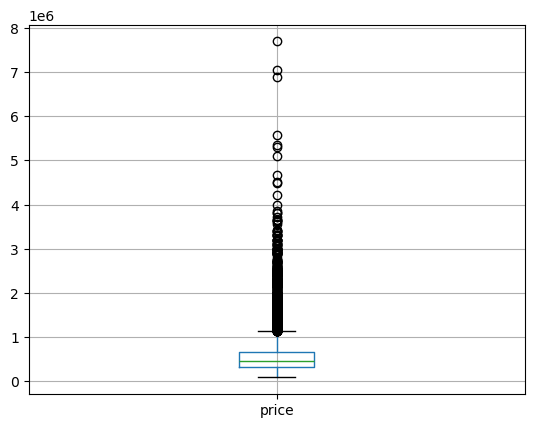

In [208]:
df.boxplot(column=['price'])
plt.show() # there are many outliers

<h3 style="color: #FF6347;">Formating</h3>

In [211]:
# Convert date column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Extract features from date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Delete the original date column
df = df.drop('date', axis=1)

In [213]:
# we eliminate columns that do not add value
df = df.drop('id', axis=1)
df = df.drop('zipcode', axis=1)

In [219]:
# Scaling of numerical variables
scaler = StandardScaler()
num_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long']
df[num_features] = scaler.fit_transform(df[num_features])

In [221]:
# We check that the value ranges have changed
print(df["sqft_living"].min(),
df["sqft_lot"].min(),
df["lat"].min(),
df["long"].min())

print(df["sqft_living"].max(),
df["sqft_lot"].max(),
df["lat"].max(),
df["long"].max())

-1.948890942688925 -0.35217587861954897 -2.9167945105621254 -2.1665429591745347
12.478065197571281 39.50433800345955 1.5700540442374933 6.383070238092647


In [223]:
# we check that all data are numbers
print(df.dtypes)
round(df.T,2)

price            float64
bedrooms           int64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int32
month              int32
day                int32
dtype: object


,0,1,2,3,4,5,6,7,8,9,...,21603,21604,21605,21606,21607,21608,21609,21610,21611,21612
price,221900.00,538000.00,180000.00,604000.00,510000.00,1225000.00,257500.00,291850.00,229500.00,323000.00,...,507250.00,429000.00,610685.00,1007500.00,475000.00,360000.00,400000.00,402101.00,400000.00,325000.00
bedrooms,3.00,3.00,2.00,4.00,3.00,4.00,3.00,3.00,3.00,3.00,...,3.00,3.00,4.00,4.00,3.00,3.00,4.00,2.00,3.00,2.00
bathrooms,1.00,2.25,1.00,3.00,2.00,4.50,2.25,1.50,1.00,2.50,...,2.50,2.00,2.50,3.50,2.50,2.50,2.50,0.75,2.50,0.75
sqft_living,-0.98,0.53,-1.43,-0.13,-0.44,3.64,-0.40,-1.11,-0.33,-0.21,...,0.21,-0.64,0.48,1.56,-0.84,-0.60,0.25,-1.15,-0.52,-1.15
sqft_lot,-0.23,-0.19,-0.12,-0.24,-0.17,2.10,-0.20,-0.13,-0.18,-0.21,...,-0.23,-0.34,-0.22,-0.19,-0.33,-0.34,-0.22,-0.33,-0.31,-0.34
floors,1.00,2.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,2.00,...,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00
waterfront,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
view,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
condition,3.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
grade,7.00,7.00,6.00,7.00,8.00,11.00,7.00,7.00,7.00,7.00,...,8.00,8.00,9.00,9.00,8.00,8.00,8.00,7.00,8.00,7.00


In [225]:
# Save a copy of df clean
df.to_csv('salida.csv', index=False)

<h1 style="color: #FF6347;">Creating the training and test</h1>

In [228]:
X = df.drop("price", axis=1)  # Characteristics
y = df["price"]  # Label

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420)

print(f"X_train: {len(X_train)} \n X_test: {len(X_test)} \n y_train: {len(y_train)} \n y_test: {len(y_test)}")

X_train: 15129 
 X_test: 6484 
 y_train: 15129 
 y_test: 6484


<h2 style="color: #FF6347;">Lazy Regresor: Looking for the best models</h2>

In [232]:
# Necesary to install lazypredict
# pip install lazypredict

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [04:06<00:04,  4.73s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2313
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 20
[LightGBM] [Info] Start training from score 537221.207152


100%|██████████| 42/42 [04:07<00:00,  5.88s/it]


In [234]:
models_lazy = models
print(models_lazy)

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
LGBMRegressor                                0.90       0.90 116213.73   
HistGradientBoostingRegressor                0.89       0.89 123673.15   
ExtraTreesRegressor                          0.89       0.89 126942.72   
RandomForestRegressor                        0.88       0.88 129987.17   
XGBRegressor                                 0.88       0.88 130095.81   
GradientBoostingRegressor                    0.87       0.87 137538.08   
BaggingRegressor                             0.86       0.86 140320.73   
KNeighborsRegressor                          0.77       0.77 179695.22   
PoissonRegressor                             0.76       0.76 184845.72   
ExtraTreeRegressor                           0.73       0.73 193772.23   
DecisionTreeRegressor                        0.73       0.73 194786.17   
TransformedTargetRegressor            

So the top 5 models: Model                                      (Adj R-Sq /    R-Sq /  RMSE /      time)

1. LGBMRegressor                                (0.90   /    0.90 / 116213.73 /   0.31)
2. HistGradientBoostingRegressor                (0.89   /    0.89 / 123673.15  /  0.46)
3. ExtraTreesRegressor                          (0.89   /    0.89 / 126942.72   / 9.03)
4. RandomForestRegressor                        (0.88   /    0.88 / 129987.17  /  19.31)
5. XGBRegressor                                 (0.88   /    0.88 / 130095.81   / 0.34)

<h2 style="color: #FF6347;">1. LGBMRegressor</h2>

In [238]:
# Necesary to install lightgbm
# pip install lightgbm

# Tuning
lgb_reg = LGBMRegressor(
    n_estimators=100,        # Número de árboles
    learning_rate=0.1,       # Tasa de aprendizaje
    max_depth=10,            # Profundidad máxima del árbol
    num_leaves=31,           # Número de hojas
    random_state=42          # Semilla para reproducibilidad
)

# Trainning model
lgb_reg.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 20
[LightGBM] [Info] Start training from score 537221.207152
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(max_depth=10, random_state=42)

In [240]:
# Prediction on the test set
y_pred_lgbm = lgb_reg.predict(X_test)

In [242]:
# Calculate metrics
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
mae_lgbm = np.mean(np.abs(y_test - y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Show results
print(f"Error cuadrático medio (MSE): {mse_lgbm:,.2f}")
print(f"Error cuadrático medio cuadrado (RMSE): {rmse_lgbm:,.2f}")
print(f"Error medio absoluto (MAE): {mae_lgbm:,.2f}")
print(f"Coeficiente de determinación (R2): {r2_lgbm:,.4f}")

Error cuadrático medio (MSE): 14,010,409,710.08
Error cuadrático medio cuadrado (RMSE): 118,365.58
Error medio absoluto (MAE): 67,397.50
Coeficiente de determinación (R2): 0.9004


<h2 style="color: #FF6347;">2. HistGradientBoostingRegressor</h2>

In [246]:
# Define the model
hgb_reg = HistGradientBoostingRegressor(
    max_iter=100,              # Number of iterations (trees)
    learning_rate=0.1,         # Learning rate
    max_depth=10,              # Maximum tree depth
    max_bins=255,              # Maximum number of bins for histograms
    random_state=42            # Seed for reproducibility
)

# Train the model
hgb_reg.fit(X_train, y_train)

HistGradientBoostingRegressor(max_depth=10, random_state=42)

In [248]:
# Prediction on the test set
y_pred_hgbr = hgb_reg.predict(X_test)

In [250]:
# Calculate metrics
mse_hgbr = mean_squared_error(y_test, y_pred_hgbr)
rmse_hgbr = mean_squared_error(y_test, y_pred_hgbr, squared=False)
r2_hgbr = r2_score(y_test, y_pred_hgbr)

# Show results
print(f"Error cuadrático medio (MSE): {mse_hgbr:,.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_hgbr:,.2f}")
print(f"Coeficiente de determinación (R2): {r2_hgbr:,.4f}")


Error cuadrático medio (MSE): 15,588,089,855.96
Raíz del error cuadrático medio (RMSE): 124,852.27
Coeficiente de determinación (R2): 0.8892


<h2 style="color: #FF6347;">3. ExtraTreesRegressor</h2>

In [254]:
# Create the model
etr = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
etr.fit(X_train, y_train)

ExtraTreesRegressor(random_state=42)

In [256]:
# Predict on the test set
y_pred_etr = etr.predict(X_test)

In [259]:
# Evaluation metrics
mse_etr = mean_squared_error(y_test, y_pred_etr)
rmse_etr = mse_etr ** 0.5
mae_etr = mean_absolute_error(y_test, y_pred_etr)
r2_etr = r2_score(y_test, y_pred_etr)

print(f"MSE: {mse_etr:.2f}")
print(f"RMSE: {rmse_etr:.2f}")
print(f"MAE: {mae_etr:.2f}")
print(f"R2 Score: {r2_etr:.2f}")

MSE: 16114454165.81
RMSE: 126942.72
MAE: 70932.62
R2 Score: 0.89


<h2 style="color: #FF6347;">4. XGBRegressor</h2>

In [263]:
# Necesary to install xgboost
# pip install xgboost

# Create the XGBRegressor model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [265]:
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [269]:
# Calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MSE: {mse_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R2 Score: {r2_xgb:.2f}")

MSE: 14961777817.48
RMSE: 122318.35
MAE: 68376.10
R2 Score: 0.89


<h2 style="color: #FF6347;">5. RandomForest</h2>

In [271]:
rf_reg = RandomForestRegressor(
    n_estimators=50,        # Reduce the number of trees
    max_depth=10,           # Limit the depth of trees
    max_features='sqrt',    # Reduce the number of features evaluated per node
    random_state=42,
    n_jobs=-1               # Use all available CPU cores
)

# Adjust the model
rf_reg.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=50,
                      n_jobs=-1, random_state=42)

In [274]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [276]:
random_forest_pred = random_forest.predict(X_test)

In [278]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, random_forest_pred)
rmse_rf = mean_squared_error(y_test, random_forest_pred, squared=False)
mae_rf = np.mean(np.abs(y_test - random_forest_pred))
r2_rf = r2_score(y_test, random_forest_pred)

# Print results
print(f"Error cuadrático medio (MSE): {mse_rf:,.2f}")
print(f"Error cuadrático medio cuadrado (RMSE): {rmse_rf:,.2f}")
print(f"Error medio absoluto (MAE): {mae_rf:,.2f}")
print(f"Coeficiente de determinación (R2): {r2_rf:,.4f}")

Error cuadrático medio (MSE): 17,187,764,885.81
Error cuadrático medio cuadrado (RMSE): 131,102.12
Error medio absoluto (MAE): 71,066.92
Coeficiente de determinación (R2): 0.8778


In [80]:
results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': random_forest_pred})
print(round(results_rf.head(),2))

         Actual  Predicted
8878   280000.0  295174.09
19302  575000.0  614953.56
1564   610000.0  544138.25
4055   703011.0  646350.63
7526   614285.0  558055.00


In [280]:
error_rf = ((((y_test-random_forest_pred)*100/random_forest_pred)**2)**(1/2))

print("\nError: ")
error_rf.mean()


Error: 


12.331875068953421

<h2 style="color: #FF6347;">Extra model: Regresion</h2>

In [50]:
# Create and train the model
model = LinearRegression() #pones el modelo
model.fit(X_train, y_train) #lo entrenas

# Make predictions
y_pred_lr = model.predict(X_test)

In [60]:
# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = np.mean(np.abs(y_test - y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

#random forest es el mejor segun ken

print(f"Error cuadrático medio (MSE): {mse_lr:,.2f}")
print(f"Error cuadrático medio cuadrado (RMSE): {rmse_lr:,.2f}")
print(f"Error medio absoluto (MAE): {mae_lr:,.2f}")
print(f"Coeficiente de determinación (R2): {r2_lr:,.4f}")

error_lr = ((((y_test-y_pred_lr)*100/y_test)**2)**(1/2))

print("\nError: ")
error_lr.mean()

Error cuadrático medio (MSE): 40,137,390,447.44
Error cuadrático medio cuadrado (RMSE): 200,343.18
Error medio absoluto (MAE): 126,179.57
Coeficiente de determinación (R2): 0.7147

Error: 


C:\Users\EliteBook\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


25.165959493726312

In [62]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
print(round(results.head(),2))

         Actual  Predicted
8878   280000.0  272020.36
19302  575000.0  701296.09
1564   610000.0  500117.49
4055   703011.0  671049.65
7526   614285.0  649066.93


<h1 style="color: #FF6347;">Final Test: User Input Predict</h1>

We ask the user to enter the parameters of their apartment to evaluate, according to the top 5 models, what would be the optimal price.

In [315]:
def get_house_data():
    house_data = []

    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = float(input("Enter number of bathrooms (per bedroom): "))
    sqft_living = float(input("Enter square footage of living space: "))
    sqft_lot = float(input("Enter square footage of land space: "))
    floors = float(input("Enter number of floors: "))
    waterfront = input("Does the house have a waterfront view? (yes/no): ").lower() == 'yes'
    view = int(input("Enter number of times the house has been viewed: "))
    condition = int(input("Enter overall condition of the house (1-5): "))
    grade = int(input("Enter overall grade of the house (1-13): "))
    sqft_above = float(input("Enter square footage of the house apart from the basement: "))
    sqft_basement = float(input("Enter square footage of the basement: "))
    yr_built = int(input("Enter the year the house was built: "))
    yr_renovated = int(input("Enter the year the house was renovated (0 if not renovated): "))
    lat = float(input("Enter latitude: "))
    long = float(input("Enter longitude: "))
    sqft_living15 = int(input("Enter interior living space for the nearest 15 neighbors in 2015: "))
    sqft_lot15 = int(input("Enter land space for the nearest 15 neighbors in 2015: "))
    date = input("Enter sale date (YYYY-MM-DD): ")

    if waterfront == True:
        waterfront = 1
    elif waterfront == False:
        waterfront = 0
    
    year, month, day = date.split("-")
    year = int(year)
    month = int(month)
    day = int(day)
    
    house_data.extend([bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15, year, month, day])

    return house_data

house_info = get_house_data()

columnas = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "grade", "sqft_above", 
    "sqft_basement", "yr_built", "yr_renovated", "lat", "long", 
    "sqft_living15", "sqft_lot15", "year", "month", "day"
]

sample = pd.DataFrame(columns=columnas)

sample.loc[len(sample)] = house_info

s_pred_lgbm = lgb_reg.predict(sample)
s_pred_hgbr = hgb_reg.predict(sample)
s_pred_etr = etr.predict(sample)
s_pred_xgb = xgb_model.predict(sample)
s_random_forest_pred = random_forest.predict(sample)

print(f"Acording to the models, The price of the house is:\n LGBMRegressor: {np.round(s_pred_lgbm, 2)}$\n HistGradientBoostingRegressor: {np.round(s_pred_hgbr, 2)}$\n ExtraTreesRegressor: {np.round(s_pred_etr, 2)}$\n RandomForestRegressor: {np.round(s_pred_xgb, 2)}$\n XGBRegressor: {np.round(s_random_forest_pred, 2)}$")

Enter number of bedrooms:  3
Enter number of bathrooms (per bedroom):  1
Enter square footage of living space:  1180
Enter square footage of land space:  5650
Enter number of floors:  1
Does the house have a waterfront view? (yes/no):  no
Enter number of times the house has been viewed:  0
Enter overall condition of the house (1-5):  3
Enter overall grade of the house (1-13):  7
Enter square footage of the house apart from the basement:  1180
Enter square footage of the basement:  0
Enter the year the house was built:  1955
Enter the year the house was renovated (0 if not renovated):  0
Enter latitude:  47.51
Enter longitude:  -122.26
Enter interior living space for the nearest 15 neighbors in 2015:  1340
Enter land space for the nearest 15 neighbors in 2015:  5650
Enter sale date (YYYY-MM-DD):  2014-10-13


                    0
bedrooms         3.00
bathrooms        1.00
sqft_living   1180.00
sqft_lot      5650.00
floors           1.00
waterfront       0.00
view             0.00
condition        3.00
grade            7.00
sqft_above    1180.00
sqft_basement    0.00
yr_built      1955.00
yr_renovated     0.00
lat             47.51
long          -122.26
sqft_living15 1340.00
sqft_lot15    5650.00
year          2014.00
month           10.00
day             13.00
                    0
bedrooms         3.00
bathrooms        1.00
sqft_living      0.00
sqft_lot         0.00
floors           1.00
waterfront       0.00
view             0.00
condition        3.00
grade            7.00
sqft_above       0.00
sqft_basement    0.00
yr_built      1955.00
yr_renovated     0.00
lat              0.00
long             0.00
sqft_living15 1340.00
sqft_lot15    5650.00
year          2014.00
month           10.00
day             13.00
Acording to the models, The price of the house is:
 LGBMRegressor: [476624.5